In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

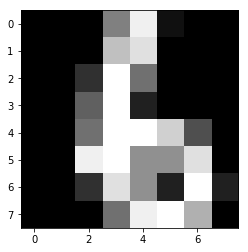

In [11]:
plt.imshow(digits.images[16], cmap='gray')

In [12]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectPercentile, f_classif
from sklearn.tree import DecisionTreeClassifier

In [17]:
pipeline = make_pipeline(MinMaxScaler(), 
                         SelectPercentile(percentile=40, score_func=chi2),
                         DecisionTreeClassifier(max_depth=10)
                        )

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
trainX,testX, trainY, testY = train_test_split(digits.data, digits.target)

In [20]:
pipeline.fit(trainX,trainY)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selectpercentile', SelectPercentile(percentile=40,
         score_func=<function chi2 at 0x0000021DB02BCB70>)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            m...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [21]:
pipeline.score(testX,testY)

0.8488888888888889

In [23]:
params = {
    'selectpercentile__percentile':[30,40,50,60],
    'selectpercentile__score_func':[chi2, f_classif],
    'decisiontreeclassifier__max_depth':[10,15]
}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
grid_model = GridSearchCV(pipeline, param_grid=params, cv= 5, n_jobs=-1)

In [26]:
grid_model.fit(trainX,trainY)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selectpercentile', SelectPercentile(percentile=40,
         score_func=<function chi2 at 0x0000021DB02BCB70>)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            m...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'selectpercentile__percentile': [30, 40, 50, 60], 'selectpercentile__score_func': [<function chi2 at 0x0000021DB02BCB70>, <function f_classif at 0x0000021DB02BCF28>], 'decisiontreeclassifier__max_depth': [10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
grid_model.best_params_

{'decisiontreeclassifier__max_depth': 15,
 'selectpercentile__percentile': 50,
 'selectpercentile__score_func': <function sklearn.feature_selection.univariate_selection.chi2>}

In [28]:
grid_model.best_score_

0.8537490720118782

In [30]:
model = grid_model.best_estimator_

In [31]:
model.score(testX,testY)

0.8533333333333334

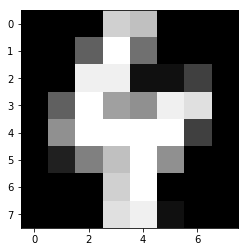

In [36]:
plt.imshow(testX[88].reshape(8,8), cmap='gray')

In [37]:
model.predict(testX[88:89])

array([4])

In [38]:
testY[88]

4

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [40]:
pipelines = []
for model in [DecisionTreeClassifier(max_depth=10), RandomForestClassifier(n_estimators=100), SVC(kernel='rbf')]:
    pipeline = make_pipeline(MinMaxScaler(), 
                         SelectPercentile(percentile=40, score_func=chi2),
                         model)
    pipelines.append(pipeline)

In [43]:
params1 = {
    'selectpercentile__percentile':[30,40,50,60],
    'selectpercentile__score_func':[chi2, f_classif],
    'decisiontreeclassifier__max_depth':[10,15]
}

params2 = {
    'selectpercentile__percentile':[30,40,50,60],
    'selectpercentile__score_func':[chi2, f_classif],
    'randomforestclassifier__n_estimators':[100,150]
}

params3 = {
    'selectpercentile__percentile':[30,40,50,60],
    'selectpercentile__score_func':[chi2, f_classif],
    'svc__C':[10,100]
}
params_list = [params1, params2, params3]

for pipeline,params in zip(pipelines,params_list):
    grid_model = GridSearchCV(pipeline, param_grid=params, cv= 5, n_jobs=-1)
    grid_model.fit(trainX,trainY)
    print (grid_model.best_score_)

0.8470675575352635


C:\Users\awant\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.9710467706013363
0.9821826280623608


C:\Users\awant\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
